In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard

In [2]:
input_image = Input(shape =(28, 28, 1))
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))


In [3]:
def build_network(input_image):
      
    # Building the encoder of the Auto-encoder
    x = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding ='same')(x)
      
    # Building the decoder of the Auto-encoder
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation ='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(x)
      
    return decoded_layer

In [4]:
decoded_layer = build_network(input_image)

In [8]:
def build_auto_encoder_model(X_train, X_test, input_image, decoded_layer):
    autoencoder = Model(input_image, decoded_layer)
    autoencoder.compile(optimizer ='adam', loss ='binary_crossentropy')
      
    # Training the Auto-encoder
    autoencoder.fit(X_train, X_train,
                epochs = 15,
                batch_size = 256,
                shuffle = True,
                validation_data =(X_test, X_test),
                )
      
    return autoencoder

In [9]:
def visualize(model, X_test):
      
    # Reconstructing the encoded images
    reconstructed_images = model.predict(X_test)
      
    plt.figure(figsize =(20, 4))
    for i in range(1, 11):
          
        # Generating a random to get random results
        rand_num = randint(0, 10001)
      
        # To display the original image
        ax = plt.subplot(2, 10, i)
        plt.imshow(X_test[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
  
        # To display the reconstructed image
        ax = plt.subplot(2, 10, i + 10)
        plt.imshow(reconstructed_images[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
          
    # Displaying the plot
    plt.show()

In [10]:
auto_encoder_model = build_auto_encoder_model(X_train,X_test,input_image,decoded_layer)

Epoch 1/15
235/235 [==============================] - 47s 195ms/step - loss: 0.2466 - val_loss: 0.1664
Epoch 2/15
235/235 [==============================] - 48s 203ms/step - loss: 0.1550 - val_loss: 0.1446
Epoch 3/15
235/235 [==============================] - 47s 202ms/step - loss: 0.1397 - val_loss: 0.1329
Epoch 4/15
235/235 [==============================] - 47s 201ms/step - loss: 0.1302 - val_loss: 0.1255
Epoch 5/15
235/235 [==============================] - 48s 202ms/step - loss: 0.1241 - val_loss: 0.1201
Epoch 6/15
235/235 [==============================] - 50s 214ms/step - loss: 0.1196 - val_loss: 0.1167
Epoch 7/15
235/235 [==============================] - 48s 203ms/step - loss: 0.1165 - val_loss: 0.1140
Epoch 8/15
235/235 [==============================] - 48s 205ms/step - loss: 0.1141 - val_loss: 0.1118
Epoch 9/15
235/235 [==============================] - 48s 205ms/step - loss: 0.1121 - val_loss: 0.1102
Epoch 10/15
235/235 [==============================] - 49s 210ms/step - l

313/313 [==============================] - 4s 12ms/step


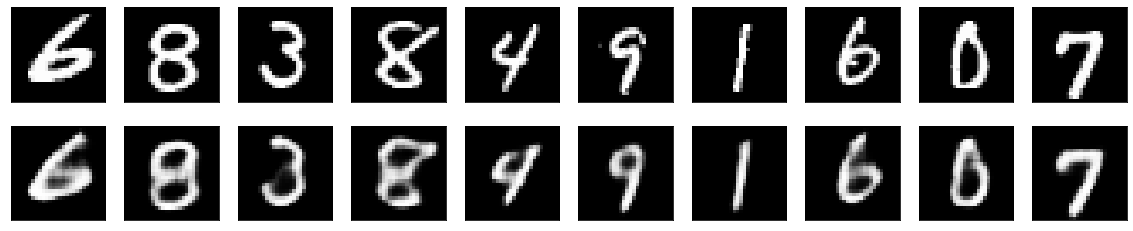

In [11]:
visualize(auto_encoder_model, X_test)